# Ritmo reproductivo básico

In [ ]:
from random import randrange
import pygame
PROBA_MUERTE = 8.4
CONTAGION_RATE = 4.0
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0
SIMULACION_SPEED = 50
nb_rows = 50
nb_cols = 50
global display, myfont, states, states_temp
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2]
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10
it = 0
total_muerte = 0
vacunar()

pygame.init() 
pygame.font.init() 
display=pygame.display.set_mode((800,750),0,32) 
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")
font=pygame.font.SysFont('Calibri', 40)
display.fill(WHITE)

while True:
    pygame.time.delay(SIMULACION_SPEED)
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() 
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10:
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE:
                        states_temp[x][y] = -1
                    else:
                        states_temp[x][y] = 1
                if state >= 10 and state <= 20:
                    if randrange(99) < PROBA_INFECT:
                        neighbour = get_vecinos(x, y)
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0:
                            states_temp[x2][y2] = 10
        states = states_temp.copy()
        total_muerte = contar_muertes()
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50))
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122))
    display.blit(textsurface, (250, 30))
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE 
            if states[x][y] == 1:
                color = GREEN 
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK 
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: 
            pygame.quit() 
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: 
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() 
    pygame.display.update()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


# COLORES 
---
- Azul No infectado
- Verde Recuperado
- Rojo Infectado 
- Negro Muerto
---- 
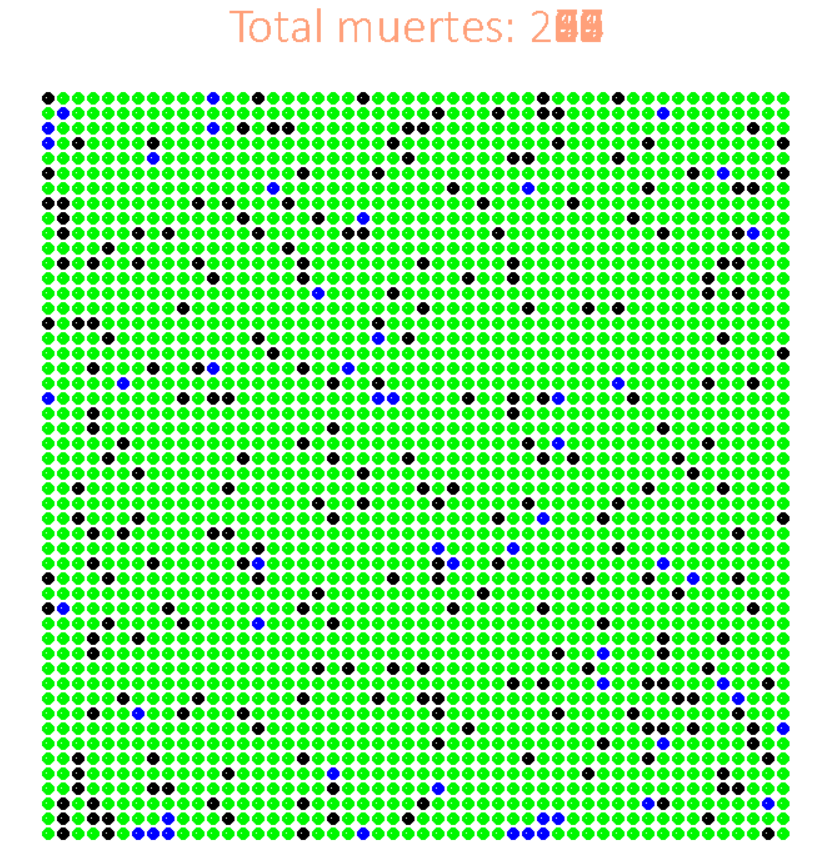

### Practica

In [ ]:
from random import randrange
import pygame

PROBA_MUERTE = 2.0 
CONTAGION_RATE = 4.0
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0
SIMULACION_SPEED = 50 
nb_rows = 50
nb_cols = 50
global display, myfont, states, states_temp 
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2]
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 
it = 0 
total_muerte = 0 
vacunar()
pygame.init() 
pygame.font.init()
display=pygame.display.set_mode((800,750),0,32) 
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")
font=pygame.font.SysFont('Calibri', 40) 
display.fill(WHITE) 
while True:
    pygame.time.delay(SIMULACION_SPEED)
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() 
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: 
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: 
                        states_temp[x][y] = -1 
                    else:
                        states_temp[x][y] = 1 
                if state >= 10 and state <= 20: 
                    if randrange(99) < PROBA_INFECT: 
                        neighbour = get_vecinos(x, y) 
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: 
                            states_temp[x2][y2] = 10 
        states = states_temp.copy()
        total_muerte = contar_muertes() 
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) 
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) 
    display.blit(textsurface, (250, 30)) 
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE 
            if states[x][y] == 1:
                color = GREEN 
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK 
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: 
            pygame.quit() 
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: 
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() 
    pygame.display.update()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


# COLORES 
---
- Azul No infectado
- Verde Recuperado
- Rojo Infectado 
- Negro Muerto
---- 
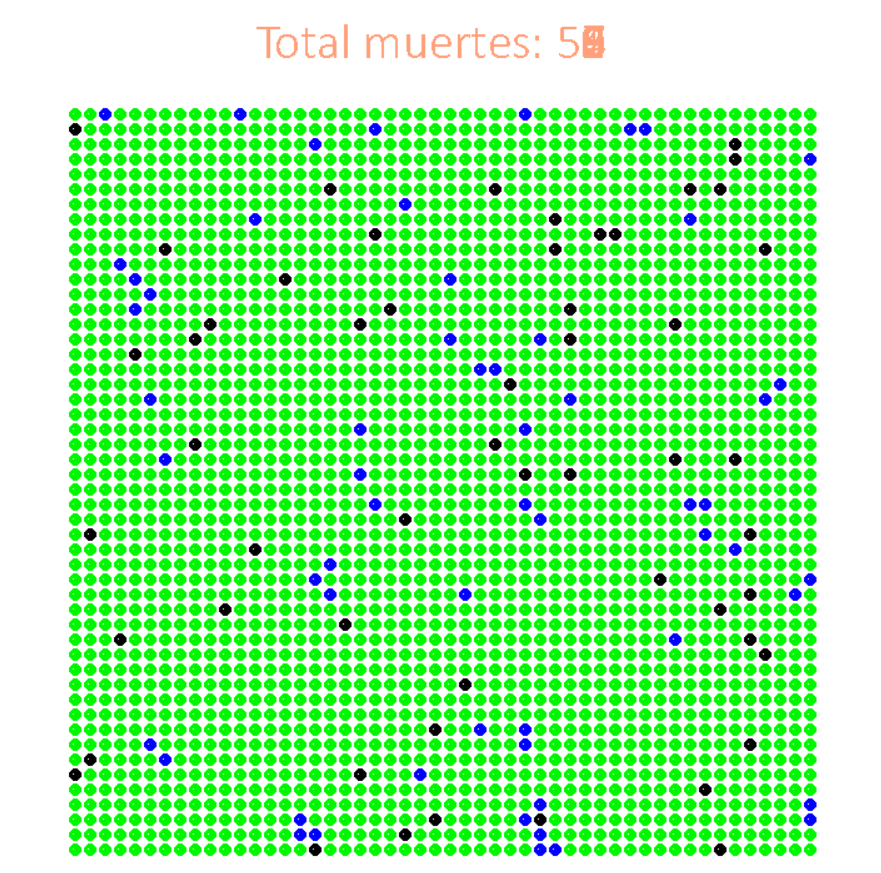

####  4. El valor 1.4 en el mejor de los casos

In [ ]:
from random import randrange
import pygame
PROBA_MUERTE = 4.0  
CONTAGION_RATE = 1.4 
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0
SIMULACION_SPEED = 50 
nb_rows = 50
nb_cols = 50
global display, myfont, states, states_temp
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10
it = 0 
total_muerte = 0
vacunar() 
pygame.init() 
pygame.font.init() 
display=pygame.display.set_mode((800,750),0,32) 
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")
font=pygame.font.SysFont('Calibri', 40) 
display.fill(WHITE) 

while True:
    pygame.time.delay(SIMULACION_SPEED) 
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() 
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: 
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE:
                        states_temp[x][y] = -1 
                    else:
                        states_temp[x][y] = 1 
                if state >= 10 and state <= 20: 
                    if randrange(99) < PROBA_INFECT: 
                        neighbour = get_vecinos(x, y) 
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0:
                            states_temp[x2][y2] = 10 
        states = states_temp.copy()
        total_muerte = contar_muertes() 
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) 
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) 
    display.blit(textsurface, (250, 30)) 
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE 
            if states[x][y] == 1:
                color = GREEN 
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK 
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() 
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: 
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar()
    pygame.display.update()

# COLORES 
---
- Azul No infectado
- Verde Recuperado
- Rojo Infectado 
- Negro Muerto
---- 
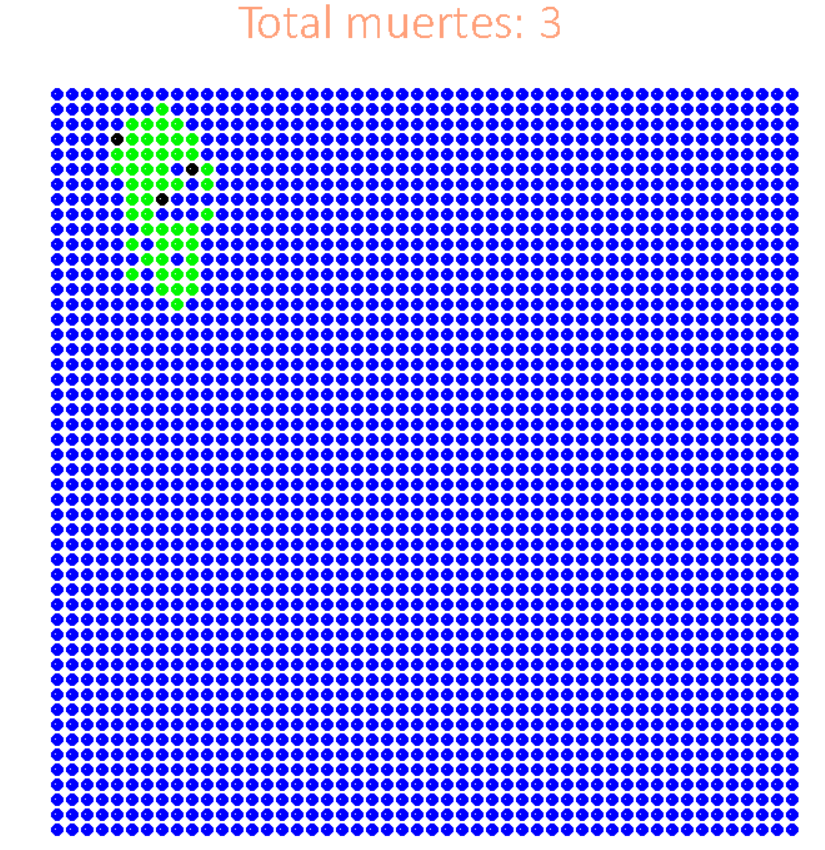

### 5. Revisar e investigar algun tipo de software que permite simular la taza de contagio en una epidemia, aplicar a los datos del Ecuador y obtener un RO con los datos del pais.

Text(0.5, 0, 'Tiempo')

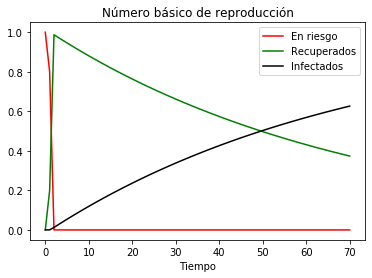

In [13]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
'''tamaño poblacional'''
N=1
beta=12.4247
gamma=0.014286
'''time step'''
TS=1.0 
ND=70.0
S0=1-1e-6
I0=1e-6
INPUT = (S0, I0, 0.0)


def diff_eqs(INP,t):  
    Y=np.zeros((3))
    V = INP
    '''Las ecuaciones diferenciales'''
    Y[0] = - beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

pl.plot(RES[:,0]*N, '-r', label='En riesgo')
pl.plot(RES[:,1]*N, '-g', label='Recuperados')
pl.plot(RES[:,2]*N, '-k', label='Infectados')
pl.legend(loc=0)
pl.title('Número básico de reproducción')
pl.xlabel('Tiempo')

### Conclusiones

Mediante la simulaciion de casos de covid podemos generar un modelo visual de los casos de covid y el riesgo potencial de fallecidos